<a href="https://colab.research.google.com/github/Venu-16/Fake-Job-Postings-Detection-/blob/main/Fake_job_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/fake_job_postings.csv")
print(df.shape)
print(df.columns)
df.head()

(17880, 18)
Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df = df.drop(columns=[
    "job_id", "telecommuting", "has_company_logo", "has_questions","salary_range", "benefits", "department"
])

In [4]:
df = df.dropna(subset= ['description', 'requirements'])

In [5]:
df['text'] = df['title'] + " " + df['description'] + " " + df['requirements']

In [6]:
df['text'].head()

,text
0,"Marketing Intern Food52, a fast-growing, James..."
1,Customer Service - Cloud Video Production Orga...
2,Commissioning Machinery Assistant (CMA) Our cl...
3,Account Executive - Washington DC THE COMPANY:...
4,Bill Review Manager JOB TITLE: Itemization Rev...


In [7]:
import nltk

In [8]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [10]:
df['clean_text'] = df['text'].apply(clean_text)

In [11]:
X = df['text']

In [12]:
y = df['fraudulent']

In [13]:
X_raw = df['clean_text'].astype(str).fillna('').reset_index(drop=True)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
text_data = df['text']
labels = df['fraudulent']
X_raw = df['clean_text'].astype(str).fillna('').reset_index(drop=True)
X_train_text, X_test_text, y_train, y_test = train_test_split(X_raw,labels, test_size= 0.2, random_state=42)
X_test_raw = X_test_text.reset_index(drop=True)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(X_train_text)
X_test = tfidf_vectorizer.transform(X_test_text)
X = tfidf_vectorizer.fit_transform(df['clean_text'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [19]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(12147, 5000) (3037, 5000)
(12147,) (3037,)


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.961475139940731

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2876
           1       0.98      0.28      0.43       161

    accuracy                           0.96      3037
   macro avg       0.97      0.64      0.71      3037
weighted avg       0.96      0.96      0.95      3037



In [25]:
import matplotlib.pyplot as plt

In [26]:
import seaborn as sns

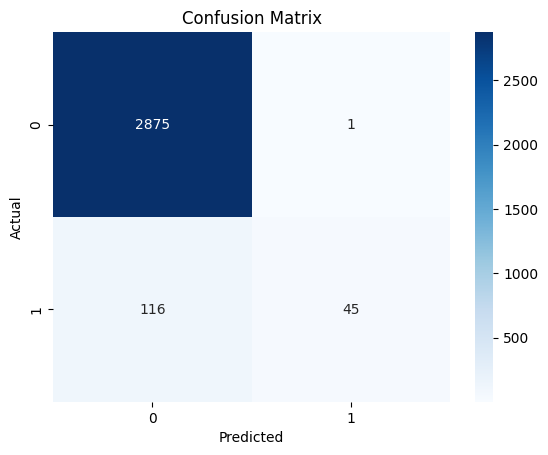

In [27]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
# plt.savefig("../visuals/confusion_matrix.png")
plt.show()

In [30]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6a29c753345a29c3571d106d8d85e8e334fa50c1ec75389991ad485b0ea828b8
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [31]:
from lime.lime_text import LimeTextExplainer

In [32]:
explainer = LimeTextExplainer(class_names=['Real', 'Fake'])

In [33]:
def predict_proba(texts):
    if isinstance(texts, str):
        texts = [texts]
    return model.predict_proba(tfidf_vectorizer.transform(texts))

In [34]:
sample_index = 0
sample_text = X_test_text.iloc[1]
print("Text:\n", sample_text)

Text:
 director content marketing director content marketing passionate experienced marketer lead content marketing efforts vision growth person work ensure content fresh full practical advice always engaging customers potential users help identify content goals strategies work rest marketingcontent team achieve goals drive awareness ultimately achieve sales product successful candidate must solid understanding inbound marketing lead generation well expertise creating engaging content highlytechnical audience ideal candidate seen expert b2b marketing space loves write – mean really loves write person able articulate business compelling way much marketer content editorhelp maintain master coschedule editorial calendar continually strengthen approach content marketingcraft newsletters social media content contribute coschedule blogcoordinate writing content contributors including freelancers guest authors staff writersexplore editorial partnerships content distribution options content ou

In [35]:
sample_index = 1
sample_text = X_test_text.iloc[2]
print("Text:\n", sample_text)

Text:
 wf17 9lu customer service apprenticeship fantastic opportunity someone wanting start career customer service first 12 months work towards level 2 customer service nvq kept permanent positionyou working distribution company role involveproviding high level customer service conversationworking alongside marketing team assist daily tasksthese tasks include adding new productsinputting information contacting service providersideal candidates computer literate excellent communication skillsif honest hard working send cv email0e92123d11734167533acc44a2e74ffac0b6f56d256225a89769e0641a3d1aee government funding available 1618 year olds job apprenticeship
